In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



This sounds like a great exercise to build a classification model and explore feature importance in a real-world financial dataset! Here's a suggested approach to tackle this:

## 1. Understand the Problem
### Goal: 
Predict if a company will go bankrupt based on given features.
### Target Variable:
3 A binary variable indicating bankruptcy (Yes/No).
### Dataset: Financial and operational metrics from companies.
# 2. Explore the Dataset
Load the Data: Use pandas to load and inspect the dataset.
Understand Features: Identify numerical, categorical, and potentially missing data.
Data Cleaning: Handle missing values, remove duplicates, and consider scaling numerical features.
3. Exploratory Data Analysis (EDA)
Visualizations:
Check class balance in the target variable (e.g., bankruptcy rates).
Analyze correlations between features and the target.
Identify trends or patterns in the data.
Insights:
Flag any potential feature engineering opportunities.
Consider dimensionality reduction if there are too many features.
4. Prepare the Data
Split the data into training and testing sets (e.g., 80/20 split).
Apply scaling/normalization if required (e.g., StandardScaler or MinMaxScaler for numerical features).
Encode categorical variables if present (e.g., OneHotEncoder or LabelEncoder).
5. Build the Classification Model
Start with basic models:
Logistic Regression
Decision Trees
Move to advanced models for better performance:
Random Forest
Gradient Boosting (e.g., XGBoost, LightGBM)
Neural Networks (if dataset size justifies it)
Evaluate each model's performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
6. Hyperparameter Tuning
Use Grid Search or Random Search for hyperparameter optimization.
Focus on balancing overfitting and underfitting.
7. Feature Importance
Use techniques to determine the most influential features:
Coefficients in Logistic Regression.
Feature importance from tree-based models.
SHAP values or LIME for model-agnostic explanations.
Visualize the importance for better interpretability.
8. Iterate and Experiment
Try additional methods not covered in class:
Use different resampling techniques (e.g., SMOTE) if the data is imbalanced.
Apply ensemble methods (e.g., stacking, bagging).
Consider feature selection techniques (e.g., Recursive Feature Elimination).
9. Document Progress
Keep track of:
Model versions and their corresponding performance metrics.
Scripts with experiments that didn’t work as expected.
Key learnings from failures and successes.
10. Final Deliverable
Deliver the optimal model with:
Trained model object.
Explanation of key features.
Insights from the model's predictions.
Good luck! Let me know if you'd like help setting up the Python scripts or exploring specific techniques.


   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

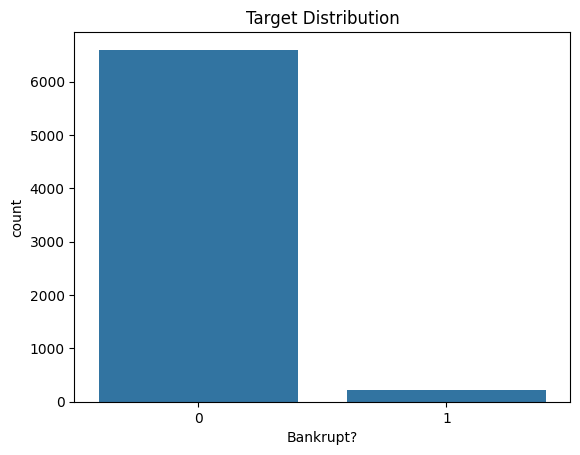

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv('datasets/data.csv')  # Replace with your actual file path

# Basic exploration
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the target variable distribution
sns.countplot(x='Bankrupt?', data=data)  # Replace 'Bankruptcy' with the actual target column name
plt.title('Target Distribution')
plt.show()


In [11]:
# Separate features and target
X = data.drop(columns=['Bankrupt?'])  # Replace 'Bankruptcy' with your target column
y = data['Bankrupt?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.30      0.14      0.19        44

    accuracy                           0.96      1364
   macro avg       0.64      0.56      0.58      1364
weighted avg       0.95      0.96      0.95      1364

ROC AUC: 0.85


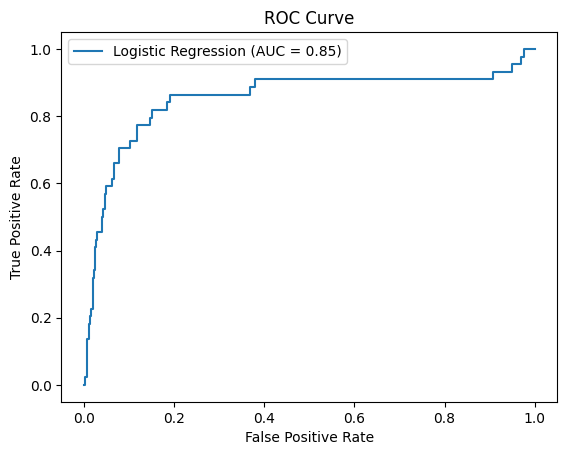

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.57      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.77      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364

ROC AUC: 0.92


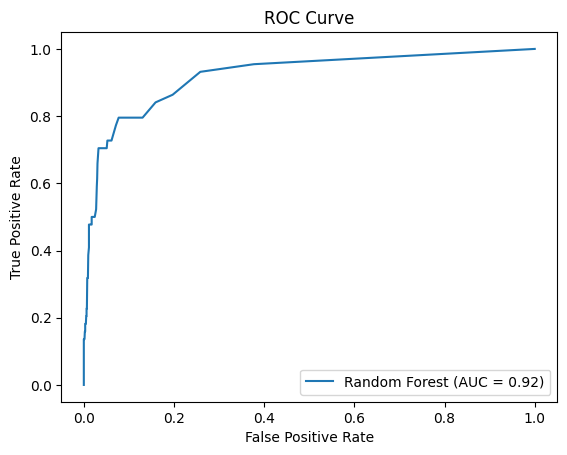

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.54      0.32      0.40        44

    accuracy                           0.97      1364
   macro avg       0.76      0.65      0.69      1364
weighted avg       0.96      0.97      0.97      1364

ROC AUC: 0.95


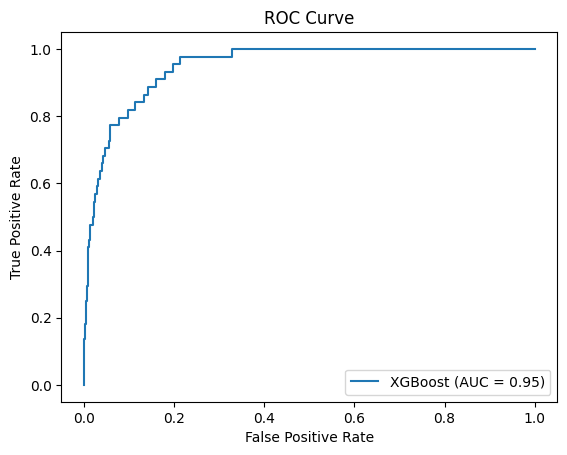

In [15]:
# Function to evaluate models
def evaluate_model(name, y_test, y_preds, probs):
    print(f"--- {name} ---")
    print(classification_report(y_test, y_preds))
    auc = roc_auc_score(y_test, probs)
    print(f"ROC AUC: {auc:.2f}")
    
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Logistic Regression Evaluation
evaluate_model('Logistic Regression', y_test, log_preds, log_model.predict_proba(X_test)[:, 1])

# Random Forest Evaluation
evaluate_model('Random Forest', y_test, rf_preds, rf_model.predict_proba(X_test)[:, 1])

# XGBoost Evaluation
evaluate_model('XGBoost', y_test, xgb_preds, xgb_model.predict_proba(X_test)[:, 1])


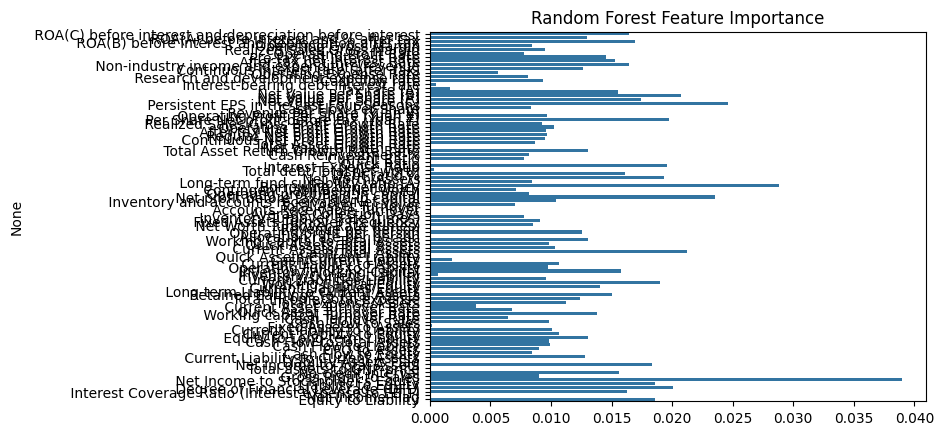

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [22]:
# Random Forest Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title('Random Forest Feature Importance')
plt.show()

# SHAP for XGBoost (requires installation of SHAP library)
import shap
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [19]:
from sklearn.model_selection import GridSearchCV

# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC: 0.9332900561129234


Dataset Head:
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                   

c:\Users\KillaEarth\Desktop\DAC-Curriculum2024\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\KillaEarth\Desktop\DAC-Curriculum2024\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.62      0.20      0.30        51

    accuracy                           0.97      1364
   macro avg       0.80      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364



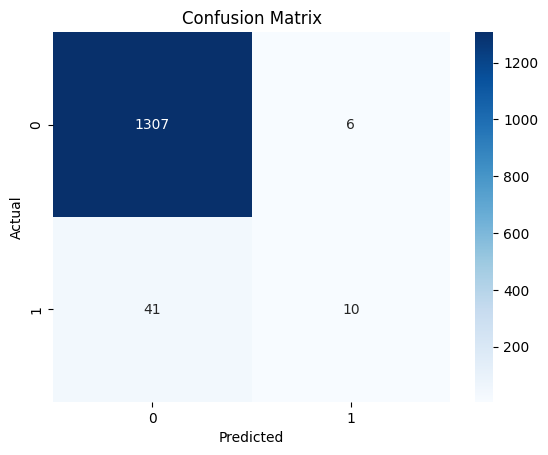

ValueError: All arrays must be of the same length

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset
file_path = 'datasets/data.csv'  # Adjust this if running locally
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nNull Value Summary:")
print(data.isnull().sum())

# Encode categorical columns (if any)
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Check for missing values and drop rows if necessary
print("Checking for missing values...")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()
print(f"Shape after dropping missing values: {data.shape}")

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Ensure features and target are consistent in length
if X.shape[0] != len(y):
    raise ValueError(f"Mismatch in lengths: Features have {X.shape[0]} rows, but target has {len(y)} rows.")

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Select top features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Imp   ortance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Bonus: Save the trained model (optional)
import joblib
model_path = 'bankruptcy_model.pkl'
joblib.dump(clf, model_path)
print(f"\nModel saved to {model_path}")
